## 1. Importing library and data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import numpy as np

In [3]:
# Loading the dataset
path = r"C:\Users\ahamr\Desktop\Munich_Accident_Forecasting\monatszahlen _verkehrsunfälle.csv"
df = pd.read_csv(path)

In [4]:
# Displaying the first few rows of the dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(2254, 9)

In [6]:
df.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2254 non-null   object 
 1   AUSPRAEGUNG                     2254 non-null   object 
 2   JAHR                            2254 non-null   int64  
 3   MONAT                           2254 non-null   object 
 4   WERT                            2086 non-null   float64
 5   VORJAHRESWERT                   2086 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1924 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  2001 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1932 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 158.6+ KB


In [8]:
# Summary statistics
df.describe()

,JAHR,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,2254.000000,2086.000000,2086.000000,1924.000000,2001.000000,1932.000000
mean,2011.965839,1403.599712,1407.038830,5.321450,2.859020,775.825052
std,7.157922,4526.041109,4547.351874,40.627602,31.783479,1161.255368
min,2000.000000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2006.000000,41.000000,41.000000,-15.497500,-11.890000,40.000000
50%,2012.000000,394.000000,394.000000,0.000000,-0.650000,422.000000
75%,2018.000000,859.000000,859.750000,18.750000,11.110000,816.000000
max,2024.000000,46988.000000,46988.000000,600.000000,425.000000,3977.000000


In [9]:
#Selecting only important columns
columns = ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']
df = df[columns]

In [10]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN


In [11]:
# Saving the data
data = df.copy()

In [12]:
df.shape

(2254, 5)

## 2. Data Preprocessing.

In [14]:
# Checking df for missing values
df.isnull().any()

MONATSZAHL     False
AUSPRAEGUNG    False
JAHR           False
MONAT          False
WERT            True
dtype: bool

In [15]:
# Converting the column to numeric, coercing errors to NaN
df['WERT'] = pd.to_numeric(df['WERT'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=['WERT']).reset_index(drop=True)

# check for missing values after dropping
print(df.isnull().any())


MONATSZAHL     False
AUSPRAEGUNG    False
JAHR           False
MONAT          False
WERT           False
dtype: bool


In [16]:
df['WERT'] = df['WERT'].astype(int)

In [17]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,Summe,493
1,Alkoholunfälle,insgesamt,2022,202201,19
2,Alkoholunfälle,insgesamt,2022,202202,32
3,Alkoholunfälle,insgesamt,2022,202203,28
4,Alkoholunfälle,insgesamt,2022,202204,34


In [18]:
# Dropping records that contain "Summe" in the 'MONAT' column
df = df[df['MONAT'] != "Summe"]

In [19]:
# Dropping records from the year 2021 and later
df = df[df['JAHR'] <= 2020]
# Restarting the index
df = df.reset_index(drop=True)

In [20]:
# Extracting the last digit from the MONAT column to get the month
df['MONAT'] = df['MONAT'].astype(str).str[-2:].astype(int)

In [21]:
df.head(24)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,1,28
1,Alkoholunfälle,insgesamt,2020,2,40
2,Alkoholunfälle,insgesamt,2020,3,27
3,Alkoholunfälle,insgesamt,2020,4,26
4,Alkoholunfälle,insgesamt,2020,5,40
5,Alkoholunfälle,insgesamt,2020,6,49
6,Alkoholunfälle,insgesamt,2020,7,58
7,Alkoholunfälle,insgesamt,2020,8,46
8,Alkoholunfälle,insgesamt,2020,9,46
9,Alkoholunfälle,insgesamt,2020,10,34


## 3. Data Analysis and Visualization.

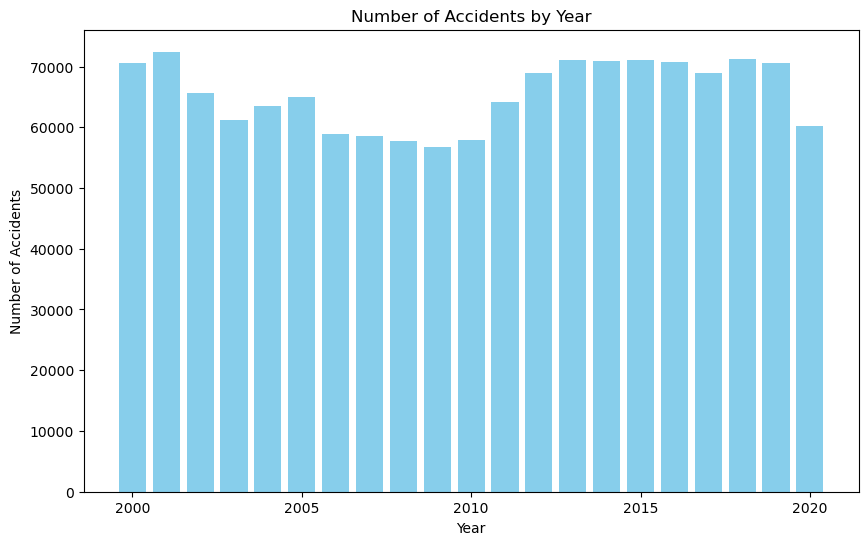

In [23]:
# Grouping data by year
yearly_data = df.groupby('JAHR')['WERT'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['JAHR'], yearly_data['WERT'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Year')
plt.savefig('accidents_by_year.png')
plt.show()

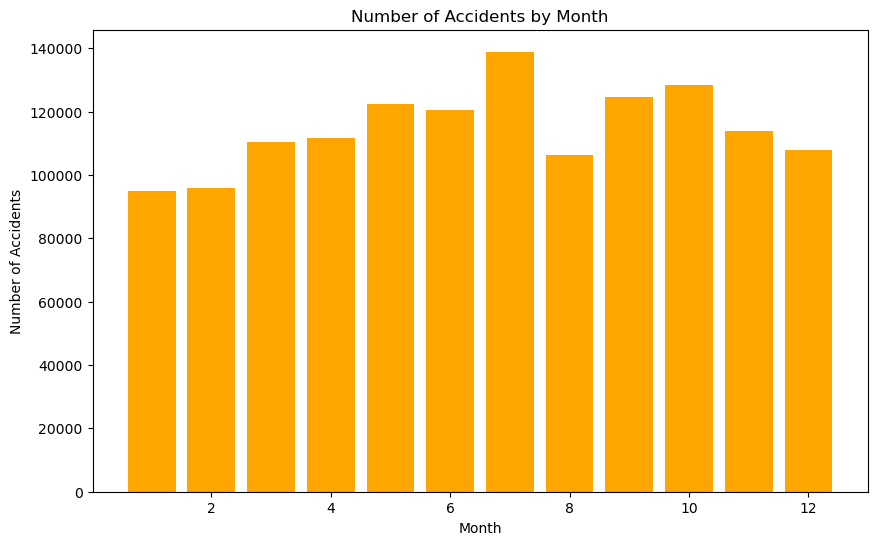

In [24]:
# Grouping data by month
monthly_data = df.groupby('MONAT')['WERT'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_data['MONAT'], monthly_data['WERT'], color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Month')
plt.savefig('accidents_by_month.png')
plt.show()

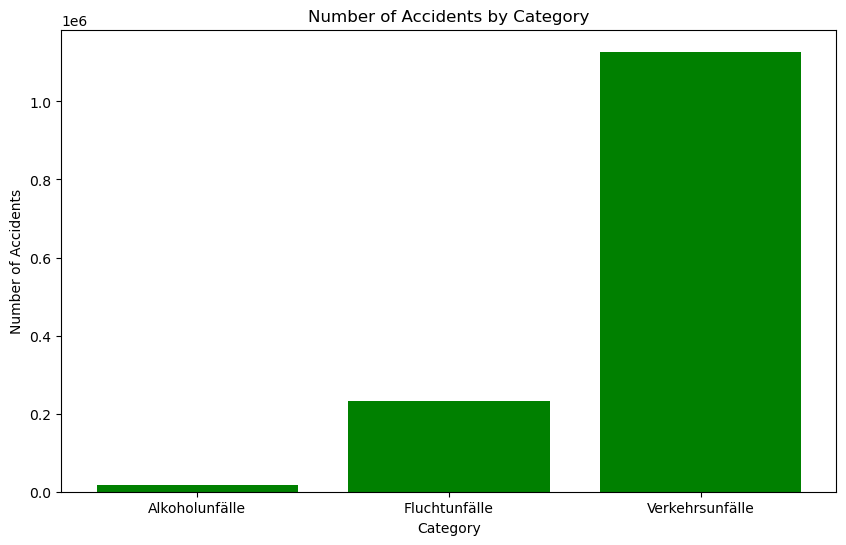

In [25]:
# Grouping data by category (MONATSZAHL)
category_data = df.groupby('MONATSZAHL')['WERT'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(category_data['MONATSZAHL'], category_data['WERT'], color='green')
plt.xlabel('Category')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Category')
plt.savefig('accidents_by_category.png')
plt.show()

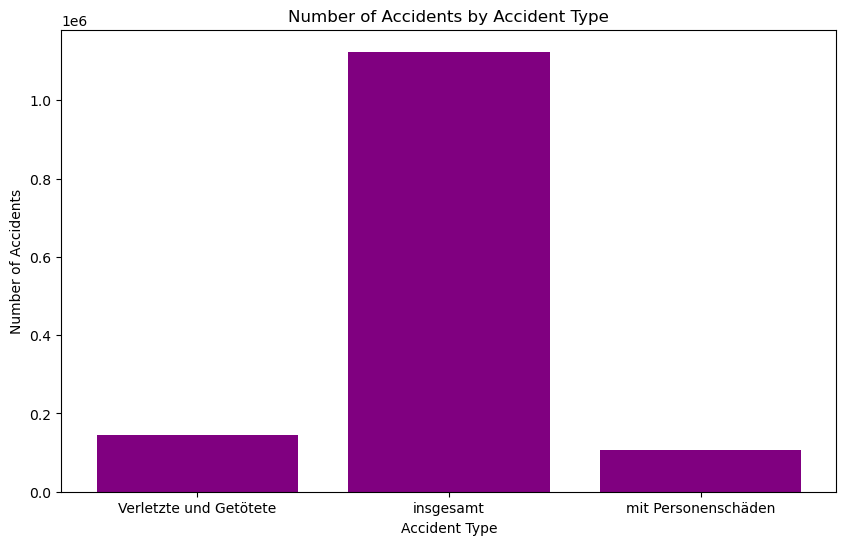

In [26]:
# Grouping data by accident type (AUSPRAEGUNG)
type_data = df.groupby('AUSPRAEGUNG')['WERT'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(type_data['AUSPRAEGUNG'], type_data['WERT'], color='purple')
plt.xlabel('Accident Type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Accident Type')
plt.savefig('accidents_by_type.png')
plt.show()

### Summary:
The data analysis reveals significant trends in accident occurrences across various categories, months, types, and years. Traffic accidents ("Verkehrsunfälle") overwhelmingly dominate, while "Alkoholunfälle" (alcohol-related accidents) and "Fluchtunfälle" (hit-and-run accidents) are considerably fewer. Seasonally, accidents peak in July and are lowest in the winter months, particularly January and February. Regarding accident types, the total number of accidents far exceeds those involving injuries or fatalities "Verletzte und Getötete". The number of accidents has shown a general trend of stability over the years, with slight fluctuations. These findings highlight the importance of focusing on traffic safety measures during peak months and continuing efforts to reduce accidents overall.

## 4. Preparing data for creating a model.

In [29]:
# Creating the 'year_month' column
df['year_month'] = df['JAHR'].astype(str) + '-' + df['MONAT'].astype(str).str.zfill(2)

In [30]:
# Filtering the dataset for 'Alkoholunfälle' and 'insgesamt'
filtered_df = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt')]

In [31]:
# Dropping the 'JAHR' and 'MONAT' columns
filtered_df = filtered_df.drop(columns=['JAHR', 'MONAT'])

In [32]:
filtered_df.head()

,MONATSZAHL,AUSPRAEGUNG,WERT,year_month
0,Alkoholunfälle,insgesamt,28,2020-01
1,Alkoholunfälle,insgesamt,40,2020-02
2,Alkoholunfälle,insgesamt,27,2020-03
3,Alkoholunfälle,insgesamt,26,2020-04
4,Alkoholunfälle,insgesamt,40,2020-05


In [33]:
# Renaming the columns
filtered_df = filtered_df.rename(columns={
    "MONATSZAHL": "category",
    "AUSPRAEGUNG": "accident_type",
    "WERT": "value"
})

In [34]:
# Displaying the processed dataframe
filtered_df.head()

,category,accident_type,value,year_month
0,Alkoholunfälle,insgesamt,28,2020-01
1,Alkoholunfälle,insgesamt,40,2020-02
2,Alkoholunfälle,insgesamt,27,2020-03
3,Alkoholunfälle,insgesamt,26,2020-04
4,Alkoholunfälle,insgesamt,40,2020-05


In [35]:
filtered_df.shape

(252, 4)

C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


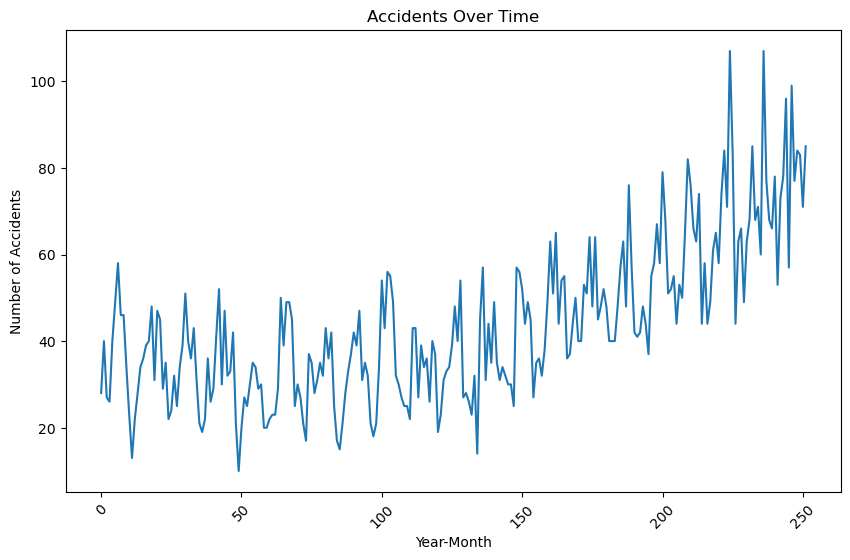

In [36]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x=filtered_df.index, y='value')
plt.title('Accidents Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.savefig('accidents_line_chart.png')  
plt.show()

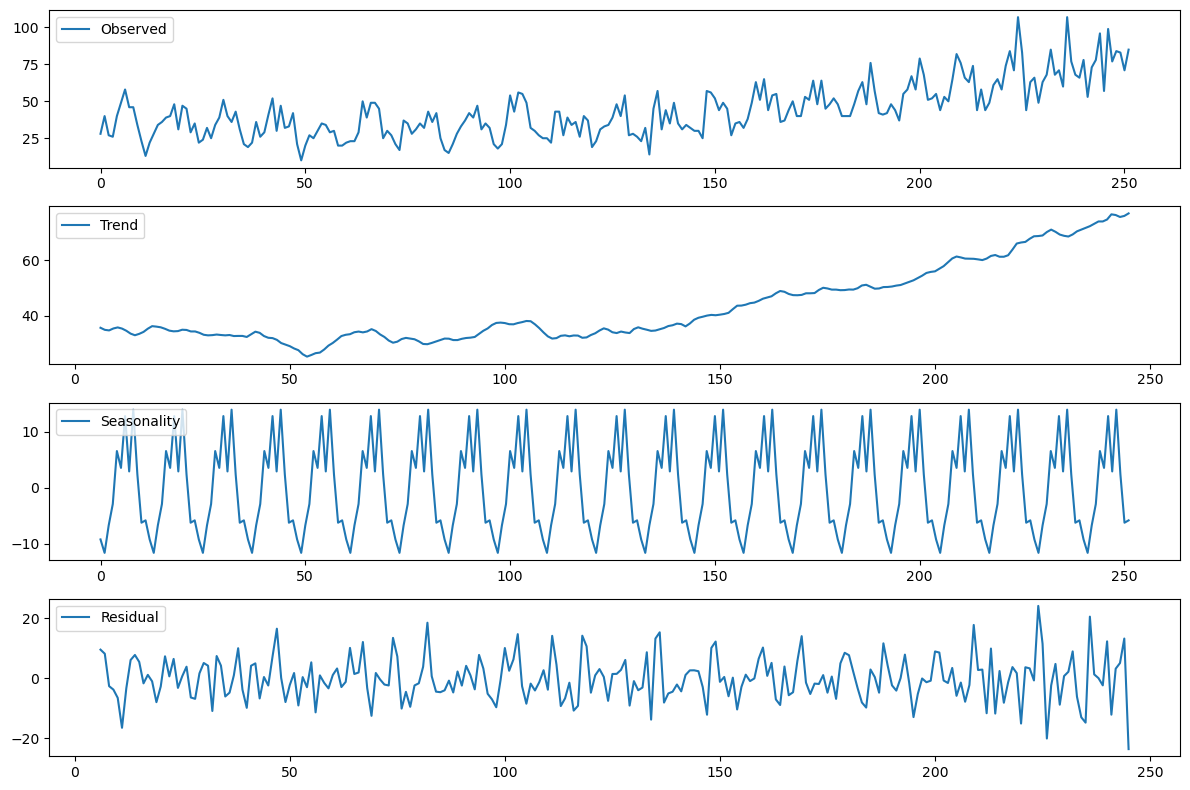

In [37]:
# Decomposing the time series
decomposition = seasonal_decompose(filtered_df['value'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('accidents_decomposition.png')  
plt.show()

## 4. Time Series Forecasting Model (SARIMA).

In [48]:
filtered_df.head()

,category,accident_type,value,year_month,year,month
0,Alkoholunfälle,insgesamt,28,2020-01,2020,1
1,Alkoholunfälle,insgesamt,40,2020-02,2020,2
2,Alkoholunfälle,insgesamt,27,2020-03,2020,3
3,Alkoholunfälle,insgesamt,26,2020-04,2020,4
4,Alkoholunfälle,insgesamt,40,2020-05,2020,5


In [50]:
# Convert year_month to datetime and set as index
filtered_df['year_month'] = pd.to_datetime(filtered_df['year_month'])
filtered_df.set_index('year_month', inplace=True)
filtered_df = filtered_df[['value']]

In [52]:
filtered_df

,value
year_month,
2020-01-01,28
2020-02-01,40
2020-03-01,27
2020-04-01,26
2020-05-01,40
...,...
2000-08-01,77
2000-09-01,84
2000-10-01,83


In [56]:
filtered_df.to_csv('filtered_data.csv')

In [122]:
# Ensure that the DataFrame index is a DatetimeIndex
filtered_df.index = pd.to_datetime(filtered_df.index)

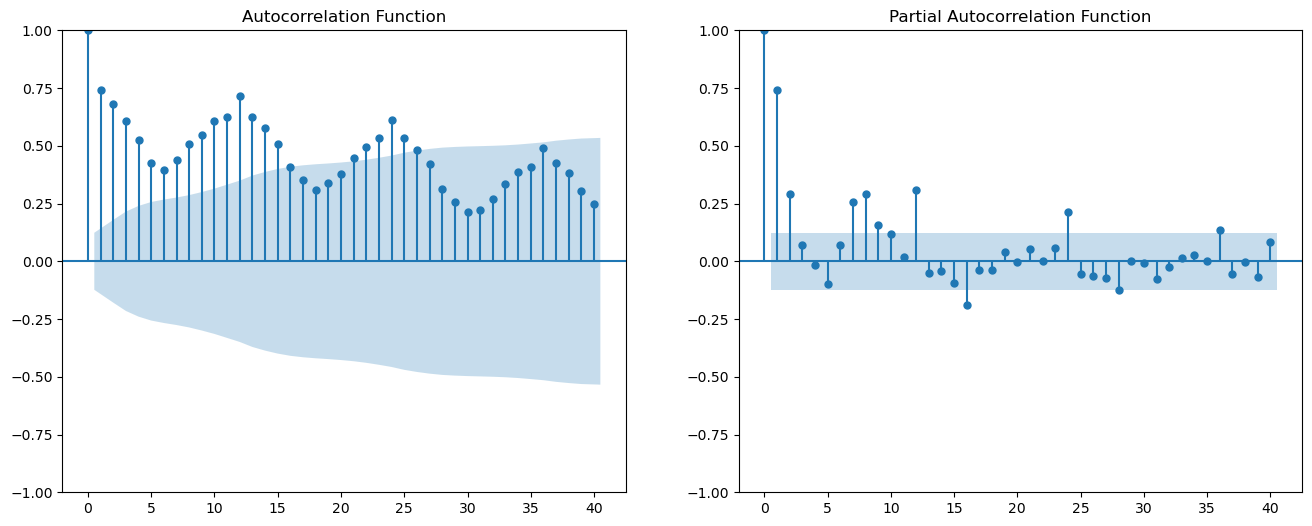

In [124]:
import statsmodels.api as sm
# Plotting ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot
sm.graphics.tsa.plot_acf(filtered_df['value'], lags=40, ax=ax[0])
ax[0].set_title("Autocorrelation Function")

# PACF plot
sm.graphics.tsa.plot_pacf(filtered_df['value'], lags=40, ax=ax[1])
ax[1].set_title("Partial Autocorrelation Function")

plt.show()

In [136]:
# Define SARIMA model with manual parameters
model = SARIMAX(filtered_df['value'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)

sarima_model = model.fit()

# Forecast for January 2021
forecast = sarima_model.get_forecast(steps=1)
forecast_value = forecast.predicted_mean
conf_int = forecast.conf_int()

# Set the correct date for the forecasted value
forecast_date = pd.to_datetime(['2021-01-01'])
forecast_value.index = forecast_date
conf_int.index = forecast_date

predicted_value = forecast_value.iloc[0]
confidence_interval = conf_int.iloc[0]

print(f"Predicted value for 2021-01: {predicted_value}")
print(f"Confidence Interval: \n{confidence_interval}")

C:\Users\ahamr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahamr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahamr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahamr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Predicted value for 2021-01: 75.02880615181401
Confidence Interval: 
lower value    58.559639
upper value    91.497973
Name: 2021-01-01 00:00:00, dtype: float64


C:\Users\ahamr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ahamr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [148]:
import pickle
# Saving the model as a pickle file
with open('sarima_model.pkl', 'wb') as file:
    pickle.dump(sarima_model, file)